<p style="color:#FFF; background:#520099; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left"></span>
<span style="width:50%; display:inline-block; text-align:right">Défi 3</span>
<span style="font-size:45px; font-style:normal"><b>Transitions de l'emploi</b></span><br>
<span style="width:49%; display:inline-block"></span>

Les avancées technologiques bouleversent le marché de l’emploi. Selon une étude publiée par Dell et l’Institut pour le futur, 85 % des emplois de 2030 n’existent pas encore. C’est dans ce contexte de transition de l’emploi que ce défi s’inscrit. Il s’attache à comprendre et qualifier les mutations économiques en cours sur le marché, les formes et les pratiques de l'emploi et du travail : évolution du statut des travailleur·se·s (auto-entreprenariat), émergence de nouveaux métiers, adéquation entre les offres et les besoins d’emplois…

# LIBRAIRIES UTILISÉES 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
import seaborn as sns
import re
from ipywidgets import interact, Dropdown

## **INDICATEUR 1 :** Évolution du nombre de création d'entreprises dans un secteur (à partir de 2000)

Source: données URSSAF

On étudie ici l'évolution du nombre de créations d'entreprises par secteur, un indicateur clé du dynamisme économique et de l'attractivité d'un territoire.  
Pour mettre ces tendances en perspective, on compare avec Toulouse, une ville de taille similaire, sur recommandation des experts de France Travail

In [14]:
# Importation des données
def load_data():
    file_toulouse = 'Toulouse_data.csv'
    file_bordeaux = 'Bordeaux_data.xlsx'
    # Charger le fichier de Toulouse en séparant les colonnes par ";"
    df_toulouse = pd.read_csv(file_toulouse, encoding='latin1', delimiter=';', on_bad_lines='skip')
    df_bordeaux = pd.read_excel(file_bordeaux, sheet_name="Export")
    return df_toulouse, df_bordeaux

# Préparation des données
def prepare_data(df, city_name):
    # Conserver uniquement les colonnes pertinentes
    df = df[['SECTEUR_D_ACTIVITE', 'DATE_CREATION_ETAB']]
    # Ajouter une colonne pour la ville
    df['Ville'] = city_name
    # Extraire uniquement l'année des 4 premiers caractères de la date
    df['Année'] = df['DATE_CREATION_ETAB'].astype(str).str[:4]
    # Filtrer les années valides
    df = df[df['Année'].str.isdigit()]
    df['Année'] = df['Année'].astype(int)
    # Filtrer les années à partir de l'an 2000
    df = df[df['Année'] >= 2000]
    df = df[df['Année'] < 2025]
    return df

# Combiner les données des deux villes
def combine_data(df_toulouse, df_bordeaux):
    df_toulouse = prepare_data(df_toulouse, "Toulouse")
    df_bordeaux = prepare_data(df_bordeaux, "Bordeaux")
    # Combiner les deux DataFrames
    combined_df = pd.concat([df_toulouse, df_bordeaux], ignore_index=True)
    return combined_df

# Regrouper les données par année pour un secteur donné
def group_data_for_sector(df, secteur):
    df_sector = df[df['SECTEUR_D_ACTIVITE'] == secteur]
    grouped = (
        df_sector.groupby(['Ville', 'Année'])
        .size()
        .reset_index(name='Nombre')
    )
    return grouped

# Tracer les données pour un secteur donné
def plot_sector_data(df, secteur):
    grouped_data = group_data_for_sector(df, secteur)
    plt.figure(figsize=(16, 7))
    if grouped_data.empty:
        print("Aucune donnée disponible pour ce secteur.")
        return
    for ville in grouped_data['Ville'].unique():
        ville_data = grouped_data[grouped_data['Ville'] == ville]
        plt.plot(
            ville_data['Année'],
            ville_data['Nombre'],
            marker='o',
            label=ville
        )
    plt.title(f"Évolution du nombre d'entreprises : {secteur} (à partir de 2000)")
    plt.xlabel("Année")
    plt.ylabel("Nombre d'entreprises")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main
def main():
    df_toulouse, df_bordeaux = load_data()
    combined_data = combine_data(df_toulouse, df_bordeaux)

    # Liste des secteurs autorisés
    secteurs_autorises = [
        "ACTIVITES DE SERVICE",
        "COMMERCES ET SERVICES AUX PARTICULIERS",
        "BTP IMMOBILIER"
    ]

    # Filtrer les secteurs disponibles
    secteurs = sorted(
        combined_data['SECTEUR_D_ACTIVITE']
        .dropna()
        .astype(str)
        .unique()
    )

    # Garder uniquement les secteurs autorisés
    secteurs = [secteur for secteur in secteurs if secteur in secteurs_autorises]

    # Création du widget interactif
    interact(
        lambda secteur: plot_sector_data(combined_data, secteur),
        secteur=Dropdown(options=secteurs, description="Secteur")
    )

if __name__ == "__main__":
    main()

/var/folders/lv/3z83m9757h30jjx01f702sxr0000gn/T/ipykernel_13488/3764340997.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_toulouse = pd.read_csv(file_toulouse, encoding='latin1', delimiter=';', on_bad_lines='skip')
/var/folders/lv/3z83m9757h30jjx01f702sxr0000gn/T/ipykernel_13488/3764340997.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ville'] = city_name
/var/folders/lv/3z83m9757h30jjx01f702sxr0000gn/T/ipykernel_13488/3764340997.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

interactive(children=(Dropdown(description='Secteur', options=('ACTIVITES DE SERVICE', 'BTP IMMOBILIER', 'COMM…

## **INDICATEUR 2 :** Évolution du nombre d'auto-entrepreneurs en Nouvelle-Aquitaine

Source: donnée URSSAF

On suit ici l'évolution du nombre d'auto-entrepreneurs par secteur d'activité (services, industrie, etc.).  
Cet indicateur permet de mesurer l'essor du travail indépendant, particulièrement marqué depuis la période post-Covid, où l'on observe un fort désir d'indépendance.  Il permet également d’évaluer l’attractivité du statut, son impact potentiel sur l’emploi, ainsi que les variations sectorielles dans la création d'activité."

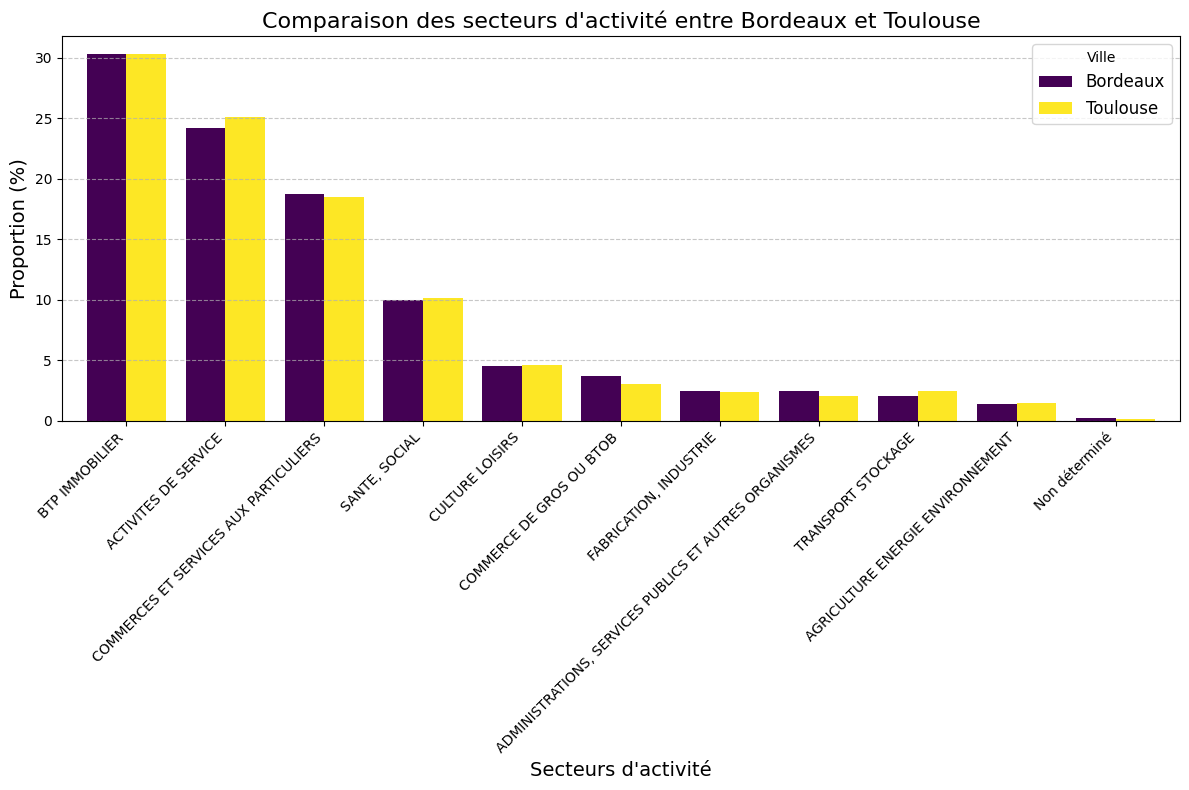

In [15]:
file_path_bdx = 'epcibdx.xlsx'  
file_path_tlse = 'epcitlse.xlsx'  
df_bdx = pd.read_excel(file_path_bdx, sheet_name="Export")
df_tlse = pd.read_excel(file_path_tlse, sheet_name="Export")
if "SECTEUR_D_ACTIVITE" in df_bdx.columns and "SECTEUR_D_ACTIVITE" in df_tlse.columns:
    secteurs_bdx = df_bdx["SECTEUR_D_ACTIVITE"].value_counts(normalize=True) * 100
    secteurs_tlse = df_tlse["SECTEUR_D_ACTIVITE"].value_counts(normalize=True) * 100
    comparaison = pd.DataFrame({
        "Bordeaux": secteurs_bdx,
        "Toulouse": secteurs_tlse
    }).fillna(0)  # Remplir les valeurs manquantes avec 0
    
    comparaison = comparaison.sort_values(by="Bordeaux", ascending=False)
    # Graphique comparatif
    comparaison.plot(kind="bar", figsize=(12, 8), width=0.8, colormap='viridis')
    plt.title("Comparaison des secteurs d'activité entre Bordeaux et Toulouse", fontsize=16)
    plt.xlabel("Secteurs d'activité", fontsize=14)
    plt.ylabel("Proportion (%)", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Ville", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("La colonne 'SECTEUR_D_ACTIVITE' est absente dans l'un des fichiers.")

Source: URSSAF

Donnée disponible par mois/année

Sur le graphique suivant, nous nous concentrons sur le top 3 des secteurs d'activité.  
On constate que l'activité de service, en tant qu'auto-entrepreneur, dépasse le BTP et le commerce à partir de 2017, avec une hausse continue qui s'accélère après la période post-Covid. De manière générale, le nombre d'auto-entrepreneurs augmente dans les trois secteurs.

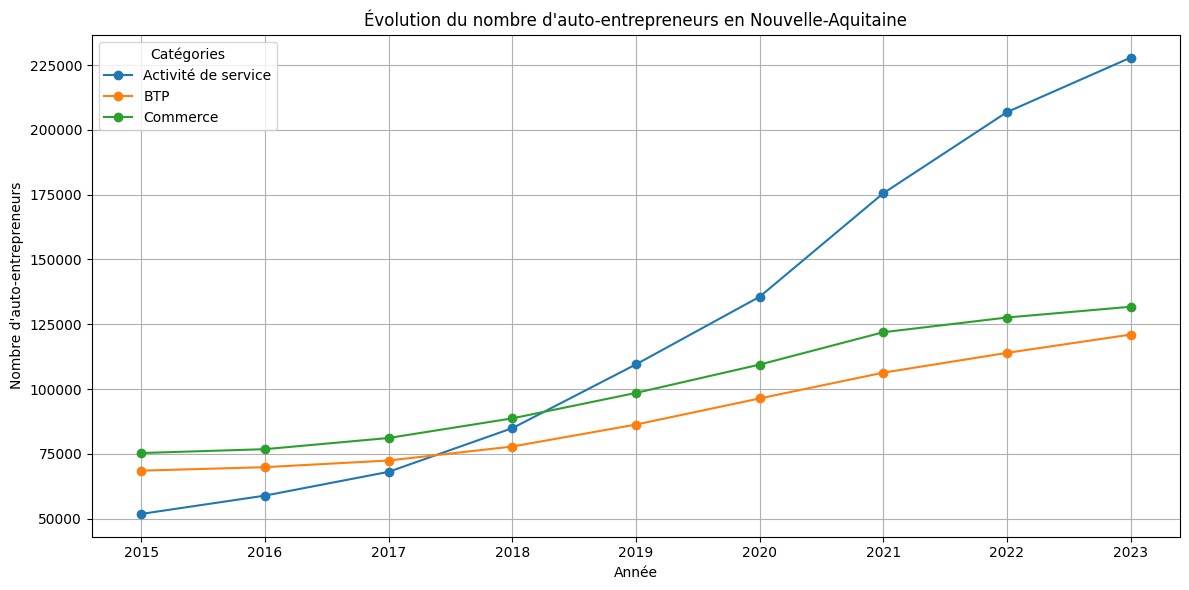

In [36]:
# Load the data (replace 'your_dataset.csv' with the actual file or URL if using an API)
data = pd.read_csv('auto-entrepreneurs-par-departement-secteur.csv', delimiter=';')

# Filter only Nouvelle-Aquitaine data
data = data[data['Région'] == 'Nouvelle-Aquitaine']

# Group sectors into categories
def categorize_sector(sector):
    # split and only take the second part, delimited by ' - '
    sector = sector.split(' - ')[-1]
    if sector.startswith('BTP'):
        return 'BTP'
    elif 'Commerce' in sector:
        return 'Commerce'
    elif 'Activité' in sector:
        return 'Activité de service'
    return None


# Apply categorization
data['Category'] = data['Secteur d\'activité'].apply(categorize_sector)

# Filter only the categories of interest
data = data[data['Category'].notnull()]

# Group by category and year for summing administratively active counts
grouped_data = data.groupby(['Année', 'Category'])[
    'Administrativement actifs'].sum().reset_index()

# Pivot table for easier plotting
pivot_data = grouped_data.pivot(
    index='Année', columns='Category', values='Administrativement actifs')

# Plot
plt.figure(figsize=(12, 6))
for category in pivot_data.columns:
    plt.plot(pivot_data.index,
             pivot_data[category], marker='o', label=category)

# Customization
plt.title("Évolution du nombre d'auto-entrepreneurs en Nouvelle-Aquitaine")
plt.xlabel("Année")
plt.ylabel("Nombre d'auto-entrepreneurs")
plt.legend(title="Catégories", loc="upper left")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

## **INDICATEUR 3 :** Part des actifs occupés de 15 ans et plus travaillant dans une autre commune que leur commune de résidence

![](images/map_actifs_mobiles.png)

## **INDICATEUR 4 :** Evolutions des demandes d’emploi en Gironde par secteur

Source: France Travail  
Les données sont agrégées par trimestre.

L'objectif ici est d'identifier les demandeurs d'emploi et leur répartition par secteur d'activité (top 10). 
On observe que les demandeurs d'emploi se concentrent principalement sur trois secteurs : les services à la personne, le support à l'entreprise et le commerce.  
Nous cherchons à analyser si la demande d'emploi dans ces secteurs est en adéquation avec l'offre disponible en Gironde

/var/folders/lv/3z83m9757h30jjx01f702sxr0000gn/T/ipykernel_13488/1080038057.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


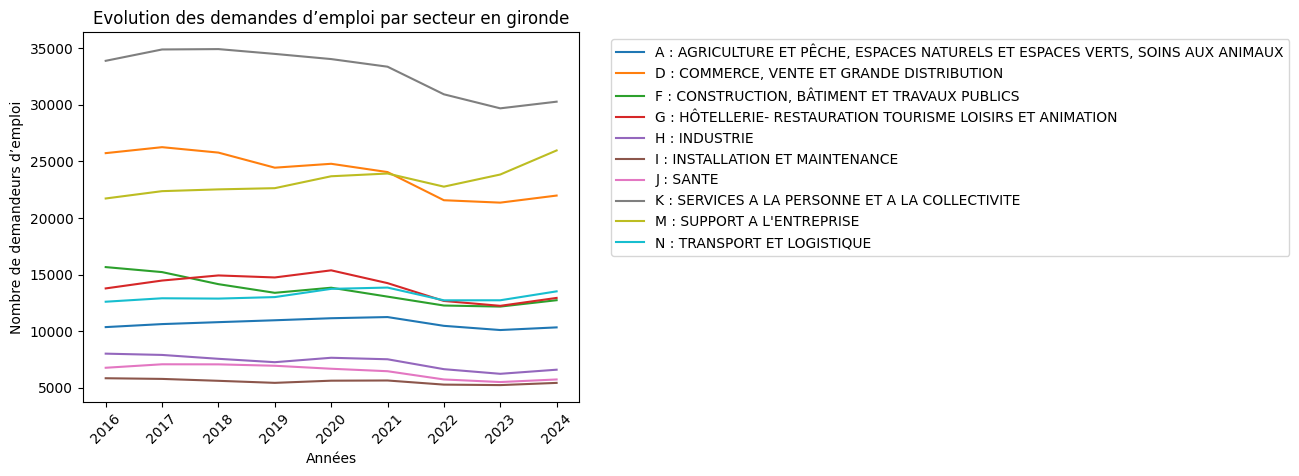

In [3]:
# Evolutions des demandes d’emploi en gironde par secteur
df_demande_gironde = pd.read_excel('Classeur2-demande.xlsx')
df_demande_gironde = df_demande_gironde.drop(columns='Total')
# Définir la locale en français
locale.setlocale(locale.LC_TIME, 'fr_FR.UTF-8')
# Convertir la colonne de date au format datetime
df_demande_gironde['Mois'] = pd.to_datetime(df_demande_gironde['Mois'])
# Convertir la colonne de date au format souhaité (mois-année)
df_demande_gironde['Mois'] = df_demande_gironde['Mois'].dt.strftime('%B-%Y')
# Convertir l’année depuis la colonne “Mois”
df_demande_gironde['Year'] = df_demande_gironde['Mois'].str.extract(r'(20\d{2})').astype(int)
# Sélection des colonnes à convertir en valeurs numériques (en ignorant “Mois” et “Year”)
cols = [c for c in df_demande_gironde.columns if c not in ['Mois', 'Year']]
for c in cols:
    df_demande_gironde[c] = df_demande_gironde[c].replace(r'\D+', '', regex=True).astype(float)
# Regrouper par année et calculer la moyenne
df_yearly = df_demande_gironde.groupby('Year', as_index=False)[cols].mean()
# Transformer en format “long” pour tracer chaque secteur
df_melt = df_yearly.melt(id_vars='Year', var_name='Secteur', value_name='Valeur')
liste_col = df_melt.groupby('Secteur')['Valeur'].mean().sort_values(ascending=False).head(10).index.to_list()
df_melt = df_melt[df_melt['Secteur'].isin(liste_col)]
# Tracer le lineplot avec la légende hors du graphique
plt.title('Evolution des demandes d’emploi par secteur en gironde', fontsize=12)
sns.lineplot(data=df_melt, x='Year', y='Valeur', hue='Secteur')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xlabel('Années')
plt.ylabel('Nombre de demandeurs d’emploi')
plt.show()

## **INDICATEUR 5 :** Évolution des offres d'emplois par secteur d'activité

Source : France Travail  
Les données sont agrégées par trimestre.

L'objectif ici est de qualifier la demande d'emploi en Gironde, définie comme les offres d'emploi postées sur le site de France Travail, et de la comparer avec les secteurs d'activité recherchés par les demandeurs d'emploi.

On note une baisse générale du nombre d'emploi disponible en 2020, période associé au Covid et à des périodes de confinement en France

Cette analyse permet d'évaluer s'il existe un décalage entre l'offre et la demande. Nous nous concentrons sur le top 10 des secteurs d'activité.  On constate que les secteurs les plus pourvoyeurs d'emploi sont les services à la personne, le commerce, la restauration-hôtellerie et les fonctions support à l'entreprise, incluant les offres dans les nouvelles technologies

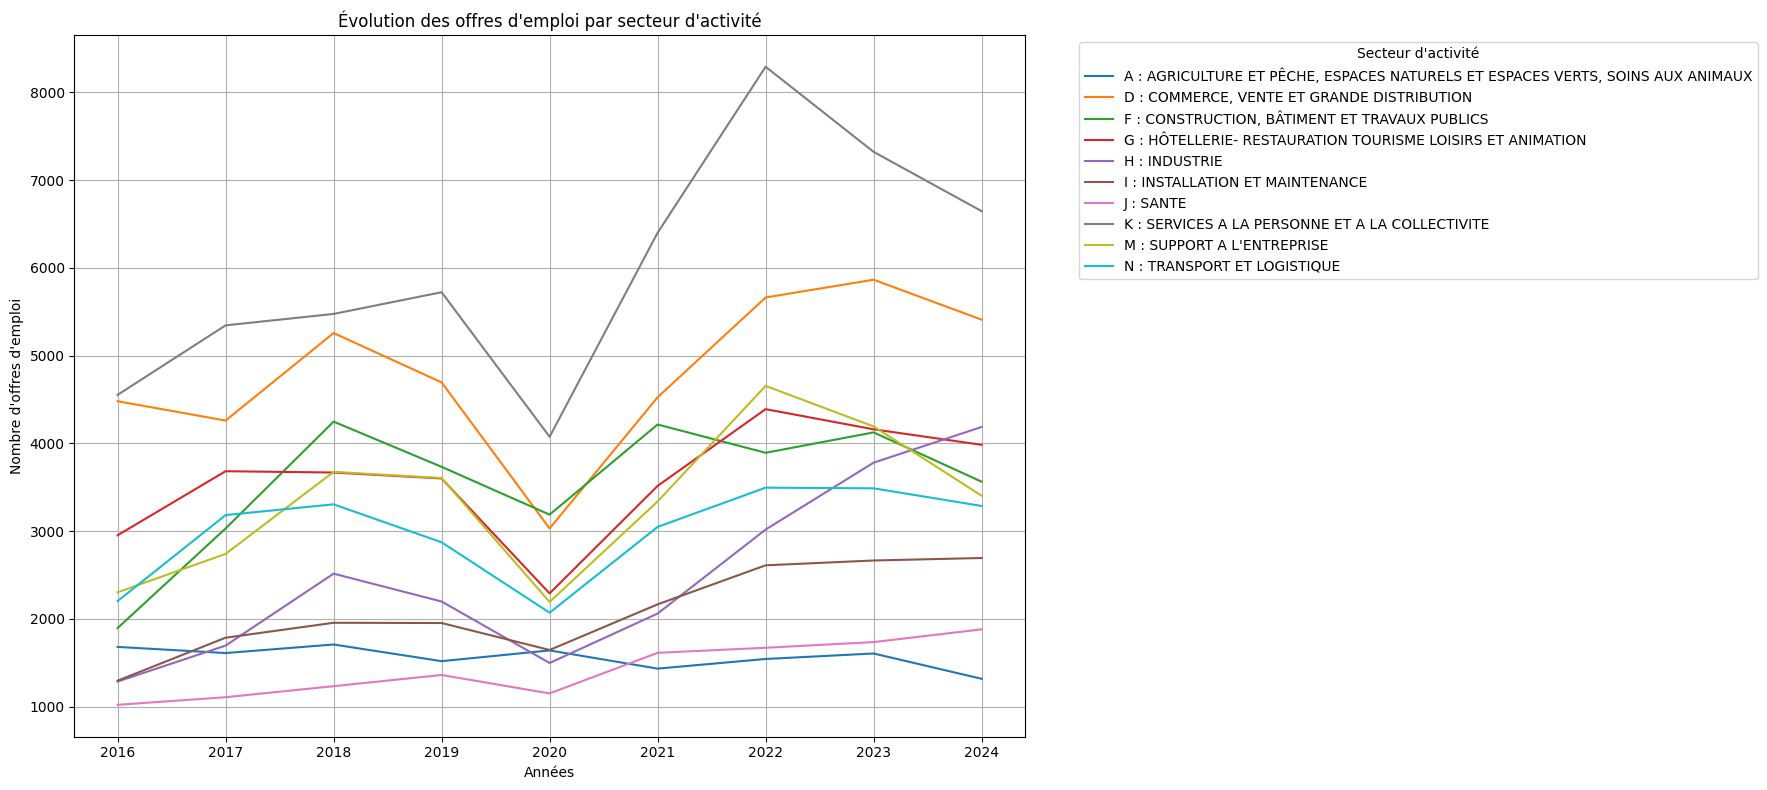

In [6]:
# Lire le fichier Excel
df = pd.read_excel("Classeur1.xlsx")
# Supprimer la colonne 'Total'
df = df.drop(columns="Total")
# Convertir les colonnes de trimestre en valeurs numériques
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col].str.replace('\u202f', '').str.replace(',', ''), errors='coerce')
# Extraire l'année de la colonne 'Trimestre'
df['Année'] = df['Trimestre'].str.extract(r'(\d{4})').astype(float)
# Calculer la moyenne des valeurs par année
df_yearly_avg = df.groupby('Année').mean(numeric_only=True).reset_index()
# Transformer le dataframe en format long pour seaborn
df_melted = df_yearly_avg.melt(id_vars='Année', var_name='Secteur', value_name='Valeur')
# Sélectionner les 10 secteurs avec la moyenne la plus élevée
col_liste = df_melted.groupby("Secteur")["Valeur"].mean().sort_values(ascending=False).head(10).index.to_list()
# Filtrer les données pour les secteurs sélectionnés
df_melted = df_melted[df_melted["Secteur"].isin(col_liste)]
# Filtrer les données pour les années >= 2016
df_melted = df_melted[df_melted["Année"] >= 2016.0]
# Créer le lineplot
plt.figure(figsize=(18, 8))
sns.lineplot(data=df_melted, x='Année', y='Valeur', hue='Secteur')
plt.title("Évolution des offres d'emploi par secteur d'activité")
plt.xlabel('Années')
plt.ylabel("Nombre d'offres d'emploi")
plt.legend(title='Secteur d\'activité', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
# Afficher le plot
plt.show()

## **INDICATEUR 6 :** Évolution du ratio offre/demande par secteur d'activité

On combine ici les indicateurs 4 et 5 pour analyser et mettre en évidence l'éventuelle inadéquation entre l'offre et la demande d'emploi en Gironde.  
En plus de la baisse marquée durant la période Covid, on constate que l'économie de la région reprend progressivement avec un pic de recrutement sur les deux années suivantes.  
Cependant, le secteur de l'industrie et de l'installation-maintenance semble peiner à recruter. Cela peut s'expliquer par la rareté des talents disponibles sur le marché, associée aux politiques de réindustrialisation et de rénovation écologique.

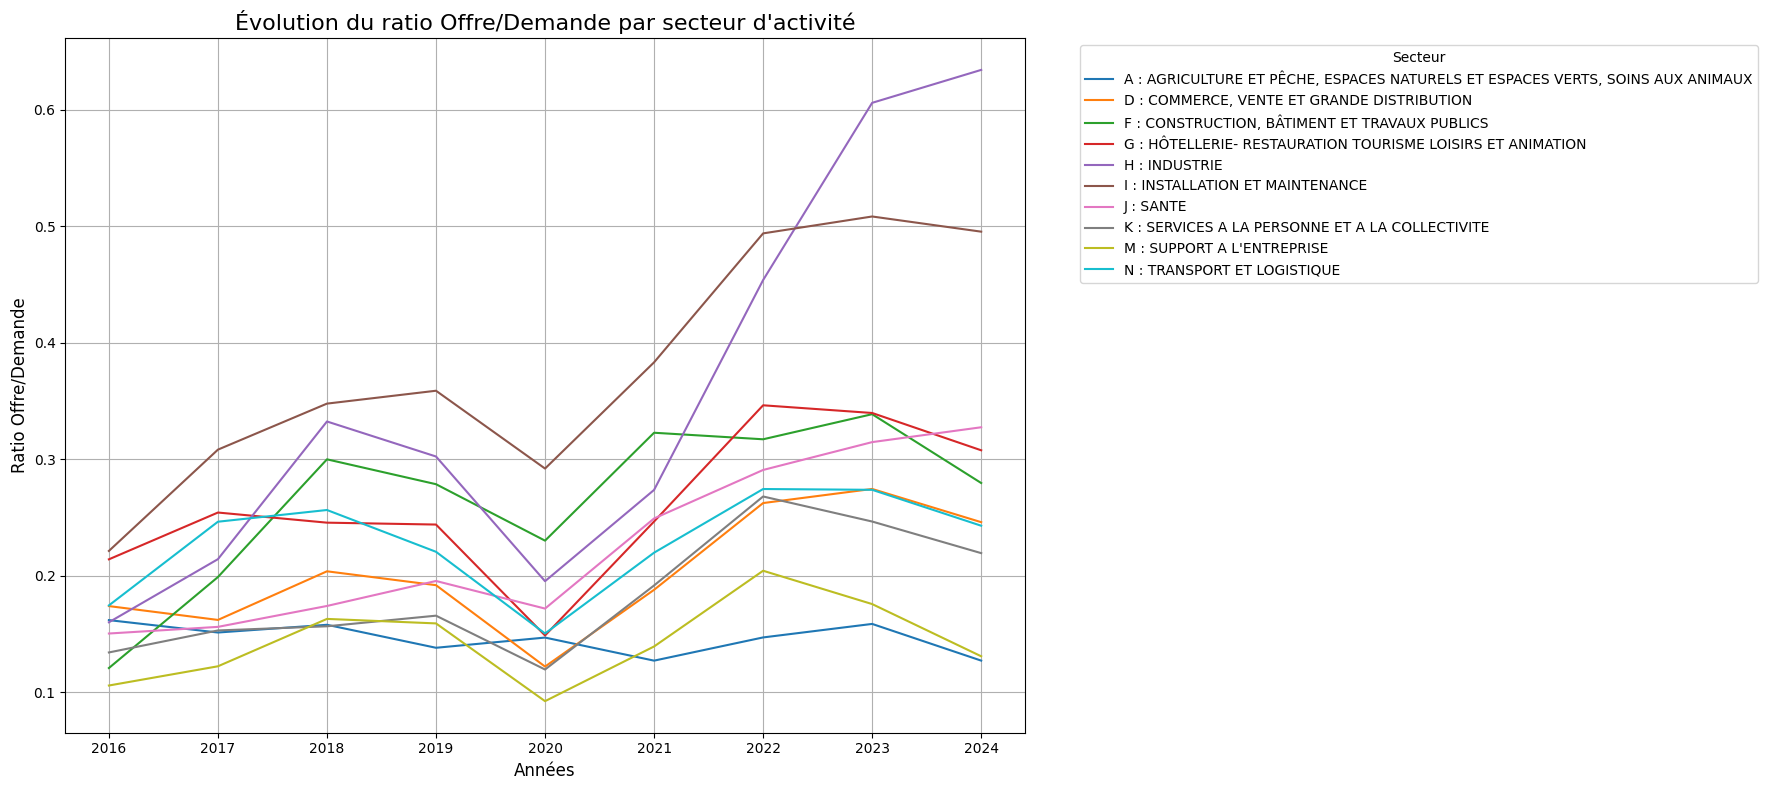

In [12]:
df_melt = df_melt.rename(columns={"Year": "Année", "Valeur": "Demande"})

# Renommer la colonne 'Valeur' dans df_melted pour indiquer qu'il s'agit des offres
df_melted = df_melted.rename(columns={"Valeur": "Offre"})

# Fusionner les deux DataFrames sur 'Année' et 'Secteur'
df_comparaison = pd.merge(df_melt, df_melted, on=['Année', 'Secteur'], how='inner')

# Calculer le ratio Offre/Demande et l'ajouter dans le DataFrame
df_comparaison['Ratio'] = df_comparaison['Offre'] / df_comparaison['Demande']

# Transformer les données en format long pour Seaborn
df_long = df_comparaison.melt(
    id_vars=['Année', 'Secteur'], 
    value_vars=['Demande', 'Offre', 'Ratio'], 
    var_name='Type', 
    value_name='Valeur'
)

# Graphe séparé pour le ratio (si besoin)
plt.figure(figsize=(18, 8))
sns.lineplot(
    data=df_long[df_long['Type'] == 'Ratio'], 
    x='Année', 
    y='Valeur', 
    hue='Secteur', 
    markers=True,
    dashes=False
)

plt.title("Évolution du ratio Offre/Demande par secteur d'activité", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Ratio Offre/Demande", fontsize=12)
plt.legend(title="Secteur", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()